In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cover-photo/Schedule an Appointment and Reminder for Patients.jpg


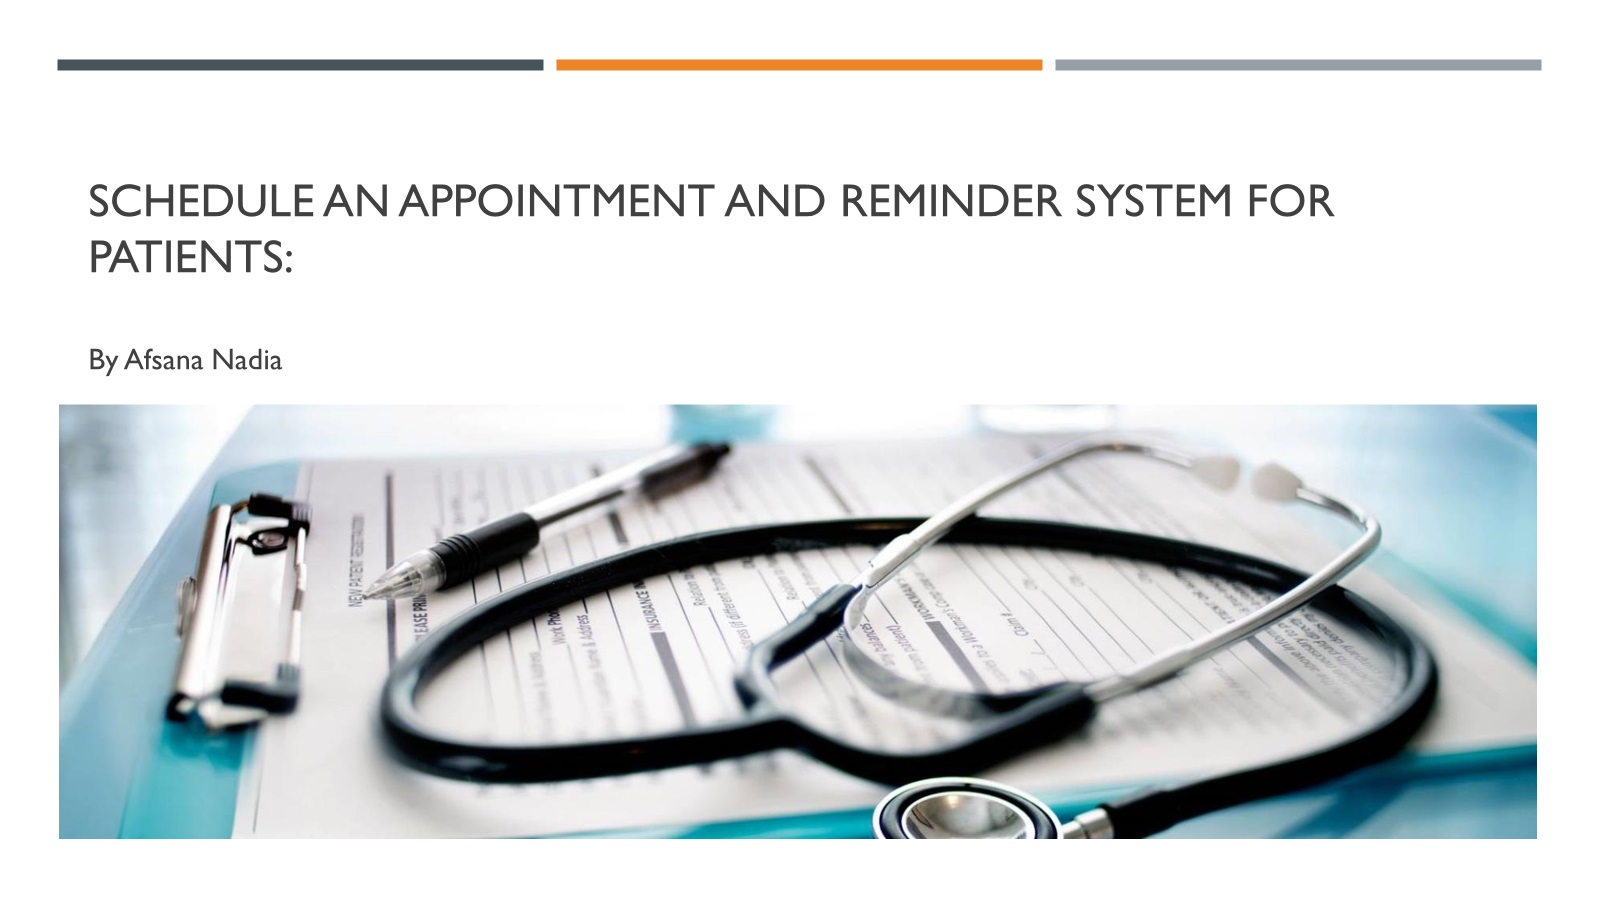

<a href="https://drive.google.com/file/d/1y3HiQlABrkZ0qNZEOYvN-JP-SgpqdI7i/view?usp=drive_link">

The system is designed to automate the process of generating appointments for multiple patients over a week. It can detect scheduling conflicts and sending reminders for appointments scheduled for the next day. This system is implemented in Python using the pandas library for data manipulation and numpy for generating random time slots.
Step 1: Generate appointments
Step 2: Detect conflicts using function appointments_df
Step 3: Generate reminders using function appointments_df

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Function to generate random appointments for a week for multiple patients
def generate_appointments(num_patients=5, num_days=7):
    patient_ids = [f'Patient_{i:03d}' for i in range(1, num_patients + 1)]
    dates = [datetime.now().date() + timedelta(days=i) for i in range(num_days)]
    times = ['09:00 AM', '11:00 AM', '02:00 PM', '04:00 PM']
    appointments = []
    for patient_id in patient_ids:
        for date in dates:
            time = np.random.choice(times)
            appointments.append([patient_id, date, time])
    df_appointments = pd.DataFrame(appointments, columns=['Patient ID', 'Date', 'Time'])
    return df_appointments

In [3]:

# Function to identify scheduling conflicts within the generated appointments
def detect_conflicts(appointments_df):
    conflicts = appointments_df[appointments_df.duplicated(subset=['Date', 'Time'], keep=False)]
    return conflicts

In [4]:
# Function to generate reminders for appointments scheduled for the next day
def generate_reminders(appointments_df):
    tomorrow_date = datetime.now().date() + timedelta(days=1)
    reminders = appointments_df[appointments_df['Date'] == tomorrow_date]
    reminder_messages = []
    for _, row in reminders.iterrows():
        message = f"Reminder: You have an appointment scheduled on {row['Date']} at {row['Time']}. Please arrive 10 minutes early."
        reminder_messages.append((row['Patient ID'], message))
    return reminder_messages

In [5]:

# Example usage of the system
appointments_df = generate_appointments()
conflicts = detect_conflicts(appointments_df)
reminders = generate_reminders(appointments_df)

print("Generated Appointments:")
print(appointments_df)

print("\nScheduling Conflicts Detected (if any):")
print(conflicts)

print("\nAppointment Reminders for the Next Day:")
for patient_id, message in reminders:
    print(f"{patient_id}: {message}")

Generated Appointments:
     Patient ID        Date      Time
0   Patient_001  2024-02-22  04:00 PM
1   Patient_001  2024-02-23  02:00 PM
2   Patient_001  2024-02-24  02:00 PM
3   Patient_001  2024-02-25  04:00 PM
4   Patient_001  2024-02-26  11:00 AM
5   Patient_001  2024-02-27  09:00 AM
6   Patient_001  2024-02-28  04:00 PM
7   Patient_002  2024-02-22  11:00 AM
8   Patient_002  2024-02-23  04:00 PM
9   Patient_002  2024-02-24  11:00 AM
10  Patient_002  2024-02-25  04:00 PM
11  Patient_002  2024-02-26  04:00 PM
12  Patient_002  2024-02-27  09:00 AM
13  Patient_002  2024-02-28  09:00 AM
14  Patient_003  2024-02-22  09:00 AM
15  Patient_003  2024-02-23  09:00 AM
16  Patient_003  2024-02-24  02:00 PM
17  Patient_003  2024-02-25  04:00 PM
18  Patient_003  2024-02-26  11:00 AM
19  Patient_003  2024-02-27  04:00 PM
20  Patient_003  2024-02-28  04:00 PM
21  Patient_004  2024-02-22  11:00 AM
22  Patient_004  2024-02-23  11:00 AM
23  Patient_004  2024-02-24  11:00 AM
24  Patient_004  2024-02-2

Improvements:

The system can be extended to include features such as appointment cancellation, rescheduling, and integration with email or SMS services for sending reminders.

Concluding Line:

The appointment scheduling and reminder system provides a convenient and efficient way to manage appointments for multiple patients, detect conflicts, and send reminders to patients. By automating these tasks, healthcare professionals can save time and ensure a smoother scheduling process.